# <font color=#219ebc>Recommandation de films - Modelisation </font>

# Sommaire
* [Configuration](#Configuration)
* [Chargement des données](#Chargement-des-donnees)
* [Filtrage sur le contenu](#Filtrage-sur-le-contenu)
    * [Similarités](#Similarites)
    * [KMeans](#KMeans)

## <font color=#fb8500>Configuration</font>

In [1]:
import matplotlib as mplt

import seaborn as sns
sns.set(font='Franklin Gothic Book',rc={
 'axes.axisbelow': False,
 'axes.edgecolor': 'lightgrey',
 'axes.facecolor': 'None',
 'axes.grid': False,
 'axes.labelcolor': 'dimgrey',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'figure.facecolor': 'white',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'dimgrey',
 'xtick.bottom': False,
 'xtick.color': 'dimgrey',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'dimgrey',
 'ytick.direction': 'out',
 'ytick.left': False,
 'ytick.right': False})

# use the .set_context() method to fine-tune font size settings.
#sns.set_context("notebook", rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":14})

mplt.font_manager._rebuild()

## <font color=#fb8500>Chargement des donnees</font>

In [2]:
import time
start=time.time()

In [3]:
import pandas as pd

dfGenres=pd.read_csv("./movie_genres.csv",sep=",",encoding="utf-8")
dfPlots=pd.read_csv("./movie_plots.csv",sep=",",encoding="utf-8")
dfMovies=pd.read_csv("./movie_metadata_clean.csv",sep=",",encoding="utf-8")

In [4]:
dfGenres.shape

(4919, 26)

In [5]:
dfPlots.head()

,Unnamed: 0,1000000_b.c.,10_year_old,1190s,12_step_program,12_year_old,12_year_time_span,12th_century,13_year_old,13_year_olds,...,zodiac,zodiac_killer,zoloft,zombie,zombie_apocalypse,zombie_spoof,zoo,zookeeper,zoologist,zorro
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
dfMovies.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,color,james cameron,723.0,178.0,0.0,855.0,joel david moore,1000.0,760505847.0,action adventure fantasy sci_fi,...,3054.0,english,usa,pg 13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,color,gore verbinski,302.0,169.0,563.0,1000.0,orlando bloom,40000.0,309404152.0,action adventure fantasy,...,1238.0,english,usa,pg 13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,color,sam mendes,602.0,148.0,0.0,161.0,rory kinnear,11000.0,200074175.0,action adventure thriller,...,994.0,english,uk,pg 13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,color,christopher nolan,813.0,164.0,22000.0,23000.0,christian bale,27000.0,448130642.0,action thriller,...,2701.0,english,usa,pg 13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,doug walker,NaN,NaN,131.0,NaN,rob walker,131.0,NaN,documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


## <font color=#fb8500>Filtrage sur le contenu</font>

Les moteurs de recommandation de contenu n'ont pas besoin de notes de l'utilisateur.\
Calculons à quel point chaque film est proche ou éloigné l'un de l'autre, en fonction des variables.

### <font color=#ffb703>Similarites</font>

#### Similarite cosinus

Soit A le vecteur film, B le vecteur genre

$\displaystyle sim(A,B)=cos(θ)=\frac{A.B}{\|A\| \|B\|}$

Sur la base de la valeur du cosinus, qui varie entre -1 et 1, les films sont classés par ordre décroissant

In [7]:
import numpy as np

def similariteCosinus(A, B):
    AB=A.T.dot(B)
    ANorm=np.linalg.norm(A)
    BNorm=np.linalg.norm(B)
    
    #result=np.dot(A,B)/(np.linalg.norm(A)*np.linalg.norm(B))
    result = AB/(ANorm * BNorm)
    return result

In [8]:
# calcul de similarité Cosinus entre 2 films (par genre)
A = np.array(dfGenres.iloc[1])
B = np.array(dfGenres.iloc[2])
similariteCosinus(A,B)

0.4472135954999579

In [9]:
def matriceSimilariteCosinus(A,B):
    num=np.dot(A,B.T)
    p1=np.array(np.sqrt(np.sum(A**2,axis=1)))[:,np.newaxis]
    p2=np.array(np.sqrt(np.sum(B**2,axis=1)))[np.newaxis,:]
    return num/(p1*p2)

In [10]:
# calcul de similarité entre l'ensemble des 4000 films suivant leurs genres
m=matriceSimilariteCosinus(dfGenres,dfGenres)
print(m)

[[1.         0.89442719 0.5        ... 0.         0.57735027 0.        ]
 [0.89442719 1.         0.4472136  ... 0.2236068  0.51639778 0.31622777]
 [0.5        0.4472136  1.         ... 0.         0.57735027 0.        ]
 ...
 [0.         0.2236068  0.         ... 1.         0.         0.70710678]
 [0.57735027 0.51639778 0.57735027 ... 0.         1.         0.        ]
 [0.         0.31622777 0.         ... 0.70710678 0.         1.        ]]


findfont: Font family ['Franklin Gothic Book'] not found. Falling back to DejaVu Sans.


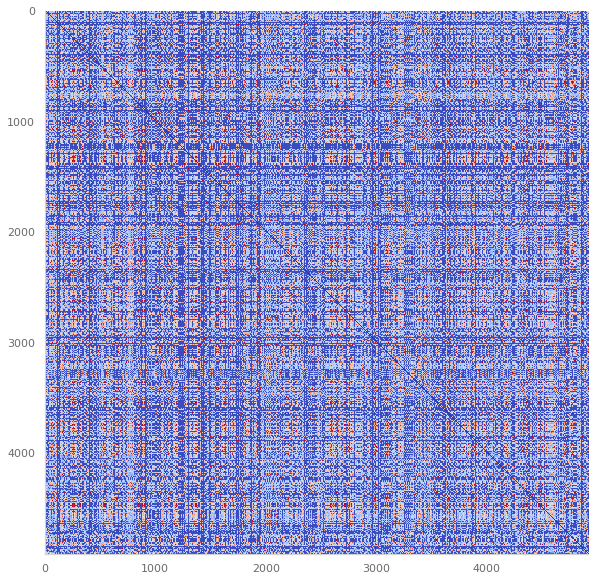

In [11]:
# Heatmap des similarités
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)

plt.imshow(m,cmap='coolwarm',interpolation='nearest')

findfont: Font family ['Franklin Gothic Book'] not found. Falling back to DejaVu Sans.


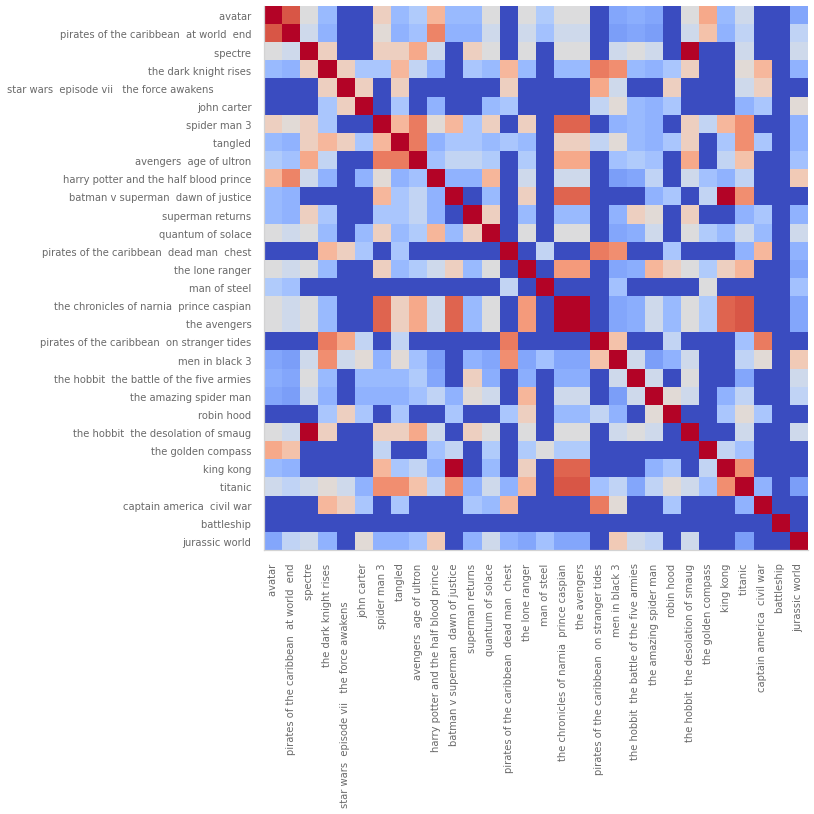

In [12]:
# Zoom Heatmap des similarités

plt.imshow(m[0:30,0:30],cmap='coolwarm',interpolation='nearest');
plt.xticks(range(30), dfMovies['movie_title'][0:30], size='small',rotation='vertical');
plt.yticks(range(30), dfMovies['movie_title'][0:30], size='small');

### <font color=#ffb703>KMeans</font>

#### <font color=black>Genres</font>

In [16]:
X = dfGenres

In [17]:
#normalisation
from sklearn import preprocessing

X_normalise=preprocessing.scale(X)
print(X_normalise.shape)

(4919, 26)


In [18]:
import numpy as np

print(np.mean(X_normalise))
print(np.var(X_normalise))

1.497265448632047e-17
0.9999999999999999


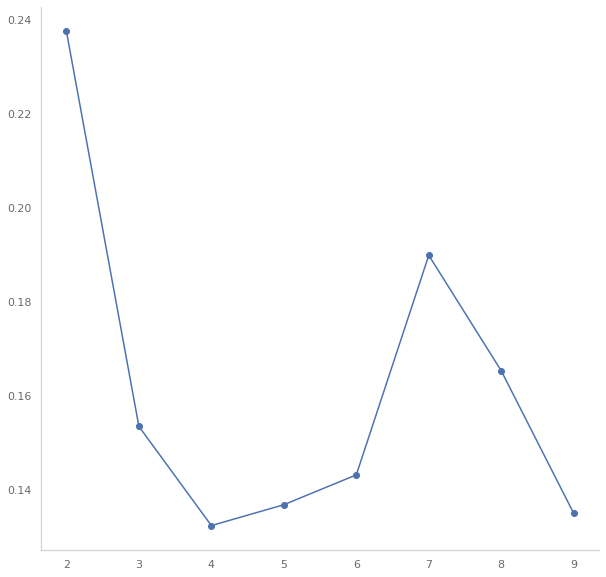

In [19]:
from sklearn import cluster, metrics
from matplotlib import pyplot as plt

silhouettes=[]
for n in range(2,10):
    c = cluster.KMeans(n_clusters=n,
                      n_init=1, init='random')# pour avoir une initialisation aleatoire et unique
    c.fit(X_normalise)# faire le clustering sur les données normalisée et calculer le coefficient de silhouette
    silhouette=metrics.silhouette_score(X_normalise,c.labels_)
    silhouettes.append(silhouette)

plt.plot(range(2,10), silhouettes, marker='o')

In [20]:
# pour projeter les donnees sur 2 dimensions
from sklearn import decomposition
pca=decomposition.PCA(n_components=26)
pca.fit(X_normalise)
print(pca.explained_variance_ratio_.cumsum())
X_trans=pca.transform(X_normalise)

[0.09712086 0.18585106 0.25185802 0.31512943 0.36596052 0.41543238
 0.46224292 0.50503027 0.54561627 0.58434905 0.62297372 0.66127328
 0.69781314 0.73184561 0.76428988 0.7963499  0.82559592 0.85397313
 0.87862291 0.90128985 0.92298012 0.9411461  0.95834614 0.97512617
 0.98879381 1.        ]


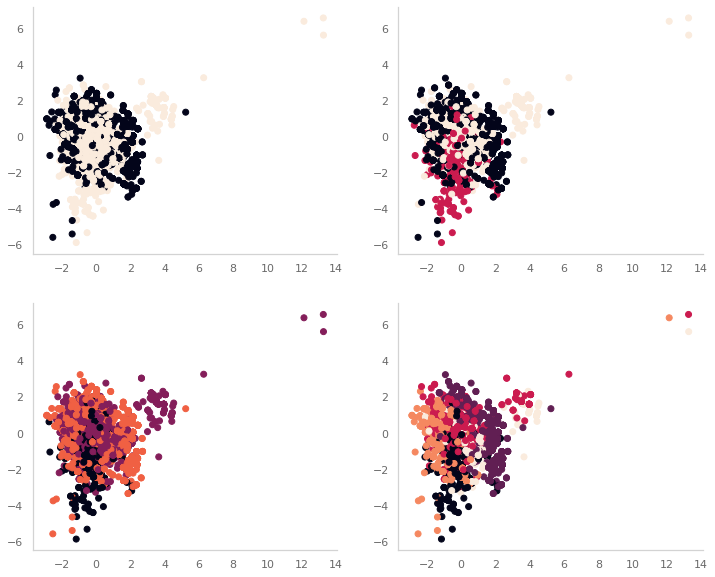

In [21]:
fig = plt.figure(figsize=(12,10))
# choix des plans factoriels
d1=4
d2=5

# separation en 2 clusters
c2=cluster.KMeans(n_clusters=2)
c2.fit(X_normalise)
ax=fig.add_subplot(221) # une sous figure en ordonnée
ax.scatter(X_trans[:,d1],X_trans[:,d2],c=c2.labels_) # projection suivant la premiere et deuxieme composante

# séparation en 3 clusters
c3=cluster.KMeans(n_clusters=3)
c3.fit(X_normalise)
ax=fig.add_subplot(222) # une sous figure en ordonnée
ax.scatter(X_trans[:,d1],X_trans[:,d2],c=c3.labels_) # projection suivant la premiere et deuxieme composante

# séparation en 4 clusters
c4=cluster.KMeans(n_clusters=4)
c4.fit(X_normalise)
ax=fig.add_subplot(223) # une sous figure en ordonnée
ax.scatter(X_trans[:,d1],X_trans[:,d2],c=c4.labels_) # projection suivant la premiere et deuxieme composante

# séparation en 5 clusters
c5=cluster.KMeans(n_clusters=5)
c5.fit(X_normalise)
ax=fig.add_subplot(224) # une sous figure en ordonnée
ax.scatter(X_trans[:,d1],X_trans[:,d2],c=c5.labels_) # projection suivant la premiere et deuxieme composante

In [22]:
now=time.time()
now-start

11.668318033218384